In [5]:
 # Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

27.800645253477214 117.87535785000205
-38.16781847868902 -127.81923476292626
4.1114259302140965 -79.71783436519527
-86.27274031190504 -45.543478514138485
37.59974691377276 -23.416156421842572
8.894066814952083 -69.35406973298079
-72.26306268700783 -144.37433869383463
-71.88316232533717 23.062320362434548
-23.058122616679526 87.48222490911985
77.30571591152221 38.12730407101219
41.773111639669025 -36.318172888206135
55.18247229133331 96.44926399379608
-68.2401974144195 3.8534784892361813
-37.70219781943538 24.399654643179957
-86.1529826802763 150.4416796872157
-25.161892232917594 -140.14960769014453
12.611827823506133 -50.97825381244826
-81.68944996095023 -10.549328514002212
73.16393235765582 145.72440932969306
3.2634551175292756 -129.51008386161047
83.7851991076169 98.50748745443622
-72.248647112402 129.4511566184686
73.37323616398703 152.0444219773127
-26.212905861050345 126.83776888270893
-65.34929572424576 32.16200978667956
-8.849765837761367 -84.82860779974159
-22.676172347316836 1

55.08291291556671 -112.15760113246355
6.745316491303342 47.330587707960206
-35.76819095830486 -74.90744643005097
-3.878059859342784 -117.57127167942768
38.94412848647218 44.54314202647933
86.50773863114952 -11.941739676930553
-64.48349255521238 33.89394597314404
-58.048019445410546 42.710259724129145
-81.7696542858154 -49.102344944771886
-4.596870094463753 -142.27791944324053
0.5219437904443538 107.39119813160596
-42.508994505786966 -20.029675942142745
71.93781172760094 -56.66453011483627
-3.137489686729438 -147.24005011447497
50.59618515946872 19.209083547221127
43.22691170779012 -7.357950229465615
-16.531194550569282 48.51402954158738
-24.45692403735889 -141.87027651603324
-54.681363195753164 -128.82029233919454
74.35614838522963 -60.85782020946459
11.18137182722154 -10.082567708512215
-34.10095953985788 -51.47956233396212
-31.18436868229763 -60.858881840022576
12.139527019205971 3.7134395697656544
-53.85161045062538 -124.60959972804554
-58.74683926961487 -130.25059847397935
3.936108

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shaowu
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | mosquera
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | guanare
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | nizhniy ingash
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | iracoubo
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | yu

Processing Record 39 of Set 4 | ambon
Processing Record 40 of Set 4 | abu dhabi
Processing Record 41 of Set 4 | sawtell
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | halifax
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | inta
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | rio gallegos
Processing Record 50 of Set 4 | alice town
Processing Record 1 of Set 5 | saurimo
Processing Record 2 of Set 5 | yanam
Processing Record 3 of Set 5 | wonthaggi
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | portland
Processing Record 7 of Set 5 | mega
Processing Record 8 of Set 5 | mehamn
Processing Record 9 of Set 5 | mackenzie
Processing Record 10 of Set 5 | vila
Processing Record 11 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 5 | adeje
Processing

Processing Record 27 of Set 8 | asau
Processing Record 28 of Set 8 | banjar
Processing Record 29 of Set 8 | sorland
Processing Record 30 of Set 8 | yinchuan
Processing Record 31 of Set 8 | itoman
Processing Record 32 of Set 8 | herat
Processing Record 33 of Set 8 | pozo colorado
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | hithadhoo
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | sept-iles
Processing Record 38 of Set 8 | yar-sale
Processing Record 39 of Set 8 | awbari
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | san quintin
Processing Record 42 of Set 8 | hushitai
Processing Record 43 of Set 8 | polyarnyy
Processing Record 44 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 8 | oktyabrskoye
Processing Record 46 of Set 8 | kloulklubed
Processing Record 47 of Set 8 | yabrud
Processing Record 48 of Set 8 | alzamay
Processing Record 49 of Set 8 | roma
Processing Record 50 of

Processing Record 18 of Set 12 | dauriya
Processing Record 19 of Set 12 | luba
Processing Record 20 of Set 12 | kuytun
Processing Record 21 of Set 12 | beidao
Processing Record 22 of Set 12 | san patricio
Processing Record 23 of Set 12 | olmos
Processing Record 24 of Set 12 | caravelas
Processing Record 25 of Set 12 | mount pleasant
Processing Record 26 of Set 12 | denpasar
Processing Record 27 of Set 12 | gladstone
Processing Record 28 of Set 12 | kamenka
Processing Record 29 of Set 12 | linjiang
Processing Record 30 of Set 12 | ozinki
Processing Record 31 of Set 12 | san luis
Processing Record 32 of Set 12 | coalinga
Processing Record 33 of Set 12 | khorixas
Processing Record 34 of Set 12 | novocheboksarsk
Processing Record 35 of Set 12 | esplanada
Processing Record 36 of Set 12 | lanja
Processing Record 37 of Set 12 | lixourion
Processing Record 38 of Set 12 | do rud
City not found. Skipping...
Processing Record 39 of Set 12 | praia
Processing Record 40 of Set 12 | ahuimanu
Processi

In [12]:
len(city_data)

572

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shaowu,27.3409,117.4831,73.56,99,100,1.50,CN,2022-05-31 19:59:07
1,Rikitea,-23.1203,-134.9692,75.69,77,48,7.34,PF,2022-05-31 19:59:07
2,Mosquera,4.7059,-74.2302,60.89,72,75,14.97,CO,2022-05-31 19:59:08
3,Ushuaia,-54.8000,-68.3000,42.46,75,40,18.41,AR,2022-05-31 19:59:08
4,Vila Franca Do Campo,37.7167,-25.4333,63.19,82,62,17.49,PT,2022-05-31 19:59:08
5,Guanare,9.0418,-69.7421,91.42,58,8,8.05,VE,2022-05-31 19:59:09
6,Mataura,-46.1927,168.8643,47.48,88,85,4.36,NZ,2022-05-31 19:59:09
7,Bredasdorp,-34.5322,20.0403,51.24,78,19,7.61,ZA,2022-05-31 19:59:10
8,Bengkulu,-3.8004,102.2655,75.45,91,100,5.55,ID,2022-05-31 19:59:10
9,Ribeira Grande,38.5167,-28.7000,64.80,72,40,12.66,PT,2022-05-31 19:59:11


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaowu,CN,2022-05-31 19:59:07,27.3409,117.4831,73.56,99,100,1.50
1,Rikitea,PF,2022-05-31 19:59:07,-23.1203,-134.9692,75.69,77,48,7.34
2,Mosquera,CO,2022-05-31 19:59:08,4.7059,-74.2302,60.89,72,75,14.97
3,Ushuaia,AR,2022-05-31 19:59:08,-54.8000,-68.3000,42.46,75,40,18.41
4,Vila Franca Do Campo,PT,2022-05-31 19:59:08,37.7167,-25.4333,63.19,82,62,17.49
5,Guanare,VE,2022-05-31 19:59:09,9.0418,-69.7421,91.42,58,8,8.05
6,Mataura,NZ,2022-05-31 19:59:09,-46.1927,168.8643,47.48,88,85,4.36
7,Bredasdorp,ZA,2022-05-31 19:59:10,-34.5322,20.0403,51.24,78,19,7.61
8,Bengkulu,ID,2022-05-31 19:59:10,-3.8004,102.2655,75.45,91,100,5.55
9,Ribeira Grande,PT,2022-05-31 19:59:11,38.5167,-28.7000,64.80,72,40,12.66


In [17]:
# Create output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

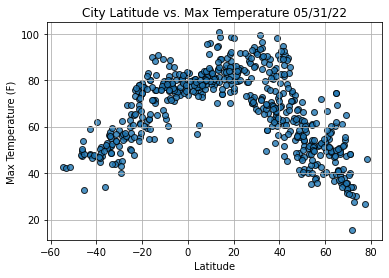

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

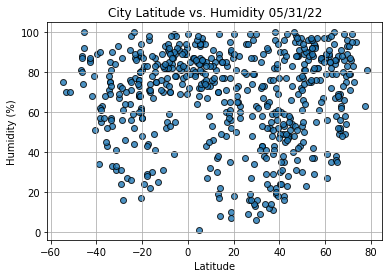

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

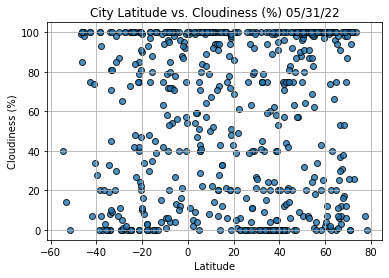

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

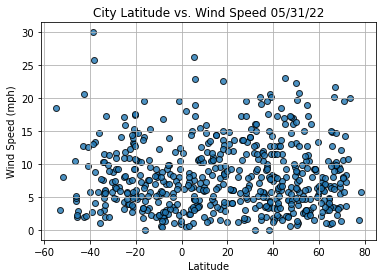

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()